In the case of a reduced three body problem where there is a central binary star system and an outer planet, I see precession of the inner star system's orbit about a mutual center of mass. I also see energy transfer between the inner star system and the outer planet in the form of loosening of the inner coils and inspiraling of the outer planet. I see less of this when the planet is further out and less massive. I also see that the Jacobi integral is the only conserved quantity, implying that this is in principle possible, but that symplectice methods are usually used to get numerical stability for the two body problem (and this is three). So I am not yet sure what the actual source of this energy and angular momentum transfer is. I believe the source of the precession and center of mass drift is in the initial conditions. The acceleration of the center of mass and wobble in it is likely due to numerical instabliity. 

In [ ]:
import math
import numpy as np

In [ ]:
import ellipsefns
#getfocus, getsemiminor, theoreticalx, theoreticaly

In [ ]:
import initdatuneq

In [ ]:
delta=0.005

In [ ]:

rad0=[10,1000]
ecc0=[0.,0.] #set ecc = 0 for circle, ecc < 1 for ellepse, = 1 for parabola, >1 for hyperbola
theta0= [0.0,0.] #math.pi/6. #math.pi/6.
mass0_1=[100.0,100.0]
mass0_2=1.0
#rad0=[10,5000]
#ecc0=[0.,0.] #set ecc = 0 for circle, ecc < 1 for ellepse, = 1 for parabola, >1 for hyperbola
#theta0= [0.0,0.] #math.pi/6. #math.pi/6.
#mass0_1=[100.0,100.0]
#mass0_2=.1
initdatinner=initdatuneq.InitialDataEqualMassConic(rad0[0],ecc0[0],theta0[0],mass0_1[0],mass0_1[0])
initdatouter=initdatuneq.InitialDataEqualMassConic(rad0[1],ecc0[1],theta0[1],np.sum(np.array(mass0_1)),mass0_2)
print(initdatinner)
print(initdatouter)

In [ ]:
import getxyuvtwouneq_apper #unequal mass version

In [ ]:
useperihelion=True

In [ ]:
xyuvouter=getxyuvtwouneq_apper.getxyuvequneq(initdatouter,useperihelion)
print(xyuvouter)
massesouter,xvecouter,avecouter=xyuvouter

In [ ]:
np.shape(xvecouter)

In [ ]:
xyuvinner=getxyuvtwouneq_apper.getxyuvequneq(initdatinner,useperihelion)
print(xyuvinner)
massesinner,xvecinner,avecinner=xyuvinner

In [ ]:
def weavexyuvtwostarsoneplanet(massesinner,massesouter,xvecinner,xvecouter, avecinner,avecouter):
    masses=np.zeros(3)
    xvec=np.zeros([3,6])
    avec=np.zeros([3,3])
    masses[0:2]=massesinner
    masses[2]=(massesouter[1])
    xvec[0:2,:]=xvecinner
    xvec[2,:]=(xvecouter[1,:])
    avec[0:2,:]=avecinner
    avec[2,:]=avecouter[1,:]
    return masses,xvec,avec
    

In [ ]:
masses,xvec,avec=weavexyuvtwostarsoneplanet(massesinner,massesouter,xvecinner,xvecouter,avecinner,avecouter)

In [ ]:
masses

In [ ]:
xvec

In [ ]:
avec

In [ ]:
xyuvatwostarsplanet=masses,xvec,avec

In [ ]:
import RK4implicit

In [ ]:
def RK4implicit(h,t,xvec,f): #not a finite difference so no step in y
    k1= h*f(t,xvec)
    k2=h*f(t+h/2, xvec+k1/2)
    k3=h*f(t+h/2,xvec+k2/2)
    k4=h*f(t+h,xvec+k3)
    return t+h, xvec+1/6.*(k1+2.*k2+2.*k3+k4)

In [ ]:
import OrbitDiffEqAdaptive

In [ ]:
#masses, xvec,avec=xyuvaequneq
ODEeq= OrbitDiffEqAdaptive.OrbitDiffEqAdaptive(masses,xvec,avec,0.0, delta)
ODEeq.print2D()
ODEeq.print2D()

In [ ]:
#print(xyuvaequneq)

In [ ]:
import timestepAdaptive

In [ ]:
import timestep3star

In [ ]:
import parabfns

In [ ]:
import ellipsefns

In [ ]:
import hyperbfns

In [ ]:
numsteps=200000 #2000000  #200000 #10000 #50000

#numsteps=6000*10

dt=.01
dtmax=1
dtmin = 0.001
outputevery=100 #1
nptimes, npstar1x, npstar2x,npstar3x, npstar1a, npstar2a,npstar3a,nperr,npdt= timestep3star.timestep3star(numsteps,dt,dtmax,dtmin,xyuvatwostarsplanet,outputevery,delta)

In [ ]:
npstar1x[0:10,:]

# Save

In [ ]:
runoutprefix='Run3/p2sr10r1000e0e0th0th0m100m100m1'
np.savetxt(runoutprefix+'t.csv',nptimes,delimiter=',')
np.savetxt(runoutprefix+'x1.csv',npstar1x,delimiter=',')
np.savetxt(runoutprefix+'x2.csv',npstar2x,delimiter=',')
np.savetxt(runoutprefix+'x3.csv',npstar3x,delimiter=',')
np.savetxt(runoutprefix+'a1.csv',npstar1a,delimiter=',')
np.savetxt(runoutprefix+'a2.csv',npstar2a,delimiter=',')
np.savetxt(runoutprefix+'a3.csv',npstar3a,delimiter=',')
np.savetxt(runoutprefix+'err.csv',nperr,delimiter=',')
np.savetxt(runoutprefix+'dt.csv',npdt,delimiter=',')

# Load

In [34]:
numsteps=200000
dt=.01
dtmax=1
dtmin = 0.001
outputevery=100 #1
delta=0.005
rad0=[10,1000]
ecc0=[0.,0.] #set ecc = 0 for circle, ecc < 1 for ellepse, = 1 for parabola, >1 for hyperbola
theta0= [0.0,0.] #math.pi/6. #math.pi/6.
mass0_1=[100.0,100.0]
mass0_2=1.0

In [46]:
import ellipsefns
import initdatuneq
initdatinner=initdatuneq.InitialDataEqualMassConic(rad0[0],ecc0[0],theta0[0],mass0_1[0],mass0_1[0])
initdatouter=initdatuneq.InitialDataEqualMassConic(rad0[1],ecc0[1],theta0[1],np.sum(np.array(mass0_1)),mass0_2)
print(initdatinner)
print(initdatouter)
import getxyuvtwouneq_apper #unequal mass version
useperihelion=True

angle 0.0
0.0
angle 0.0
0.0
(array([3.14159265, 0.        ]), 0.0, 10, 0.0, array([100., 100.]))
(array([3.14159265, 0.        ]), 0.0, 1000, 0.0, array([200.,   1.]))


In [47]:
xyuvouter=getxyuvtwouneq_apper.getxyuvequneq(initdatouter,useperihelion)
print(xyuvouter)
massesouter,xvecouter,avecouter=xyuvouter

initdat 1000 [3.14159265 0.        ] 0.0 [-1.  1.] [1.2246468e-16 0.0000000e+00]
coordsep 1000
pi
zero
[-1000.  1000.]
[0. 0.]
circle
r0 2000.0
(array([200.,   1.]), array([[-4.97512438e+00,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -2.23049868e-03,  0.00000000e+00],
       [ 9.95024876e+02,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00,  4.46099737e-01,  0.00000000e+00]]), array([[ 1.e-06, -0.e+00,  0.e+00],
       [-1.e-06, -0.e+00,  0.e+00]]))


In [48]:
xyuvinner=getxyuvtwouneq_apper.getxyuvequneq(initdatinner,useperihelion)
print(xyuvinner)
massesinner,xvecinner,avecinner=xyuvinner

initdat 10 [3.14159265 0.        ] 0.0 [-1.  1.] [1.2246468e-16 0.0000000e+00]
coordsep 10
pi
zero
[-10.  10.]
[0. 0.]
circle
r0 20.0
(array([100., 100.]), array([[-5.        ,  0.        ,  0.        , -0.        , -2.23606798,
         0.        ],
       [ 5.        ,  0.        ,  0.        , -0.        ,  2.23606798,
         0.        ]]), array([[ 1., -0.,  0.],
       [-1., -0.,  0.]]))


In [51]:
def weavexyuvtwostarsoneplanet(massesinner,massesouter,xvecinner,xvecouter, avecinner,avecouter):
    masses=np.zeros(3)
    xvec=np.zeros([3,6])
    avec=np.zeros([3,3])
    masses[0:2]=massesinner
    masses[2]=(massesouter[1])
    xvec[0:2,:]=xvecinner
    xvec[2,:]=(xvecouter[1,:])
    avec[0:2,:]=avecinner
    avec[2,:]=avecouter[1,:]
    return masses,xvec,avec
    

In [52]:
masses,xvec,avec=weavexyuvtwostarsoneplanet(massesinner,massesouter,xvecinner,xvecouter,avecinner,avecouter)

In [2]:
runinprefix='Run2/p2sr10r1000e0e0th0th0m100m100m1'


In [3]:
import csv

with open(runinprefix+'t.csv', newline='') as csvfile:
    nptimeslist = list(csv.reader(csvfile))

print(nptimeslist[0:10])

[['0.000000000000000000e+00'], ['1.000000000000000021e-02'], ['2.448418836567530302e-02'], ['4.360757856567504254e-02'], ['6.716176290463624077e-02'], ['9.470060196779207795e-02'], ['1.256643825492333444e-01'], ['1.594736240536823724e-01'], ['1.955872985611900039e-01'], ['2.335318142643339756e-01']]


In [4]:
import numpy as np
nptimes=np.zeros(len(nptimeslist))
count =0
for row in nptimeslist:
    for item in row:
        number = float(item)
        nptimes[count]=number
    count+=1

        

In [5]:
nptimes[0:10]

array([0.        , 0.01      , 0.02448419, 0.04360758, 0.06716176,
       0.0947006 , 0.12566438, 0.15947362, 0.1955873 , 0.23353181])

In [6]:
import csv

with open(runinprefix+'x1.csv', newline='') as csvfile:
    npstar1xlist = list(csv.reader(csvfile))

print(npstar1xlist[0:10])

[['-5.000000000000000000e+00', '0.000000000000000000e+00', '0.000000000000000000e+00', '-0.000000000000000000e+00', '-2.236067977499789805e+00', '0.000000000000000000e+00'], ['-4.999950000033335229e+00', '-2.236060523939820133e-02', '0.000000000000000000e+00', '9.999976666231326014e-03', '-2.236045616857148310e+00', '0.000000000000000000e+00'], ['-4.999700264955058593e+00', '-5.474721555658985939e-02', '0.000000000000000000e+00', '2.448372359610286042e-02', '-2.235933932045878869e+00', '0.000000000000000000e+00'], ['-4.999049218729362032e+00', '-9.750332925128808725e-02', '0.000000000000000000e+00', '4.360485805514121432e-02', '-2.235642775611843991e+00', '0.000000000000000000e+00'], ['-4.997744816095111453e+00', '-1.501556880383229653e-01', '0.000000000000000000e+00', '6.715173229735692251e-02', '-2.235059429599620895e+00', '0.000000000000000000e+00'], ['-4.995516563708752855e+00', '-2.116936865059784179e-01', '0.000000000000000000e+00', '9.467238939923836027e-02', '-2.234062925828740

In [7]:
npstar1x=np.zeros([len(npstar1xlist),len(npstar1xlist[0])])
rownum=0
col=0
for row in npstar1xlist:
    for item in row:
        number = float(item)
        npstar1x[rownum][col]=number
        col+=1
    col=0
    rownum+=1


In [8]:
print(npstar1x[0:10])

[[-5.          0.          0.         -0.         -2.23606798  0.        ]
 [-4.99995    -0.02236061  0.          0.00999998 -2.23604562  0.        ]
 [-4.99970026 -0.05474722  0.          0.02448372 -2.23593393  0.        ]
 [-4.99904922 -0.09750333  0.          0.04360486 -2.23564278  0.        ]
 [-4.99774482 -0.15015569  0.          0.06715173 -2.23505943  0.        ]
 [-4.99551656 -0.21169369  0.          0.09467239 -2.23406293  0.        ]
 [-4.9921063  -0.28084621  0.          0.12559837 -2.23253781  0.        ]
 [-4.98728946 -0.35629165  0.          0.15933863 -2.23038366  0.        ]
 [-4.98088498 -0.43678903  0.          0.19533819 -2.22751949  0.        ]
 [-4.9727562  -0.52124423  0.          0.23310774 -2.22388419  0.        ]]


In [9]:
import csv

with open(runinprefix+'x2.csv', newline='') as csvfile:
    npstar2xlist = list(csv.reader(csvfile))

print(npstar2xlist[0:10])

[['5.000000000000000000e+00', '0.000000000000000000e+00', '0.000000000000000000e+00', '-0.000000000000000000e+00', '2.236067977499789805e+00', '0.000000000000000000e+00'], ['4.999950000134345984e+00', '2.236060523939834010e-02', '0.000000000000000000e+00', '-9.999956464201051679e-03', '2.236045616857190055e+00', '0.000000000000000000e+00'], ['4.999700265560590218e+00', '5.474721555659190636e-02', '0.000000000000000000e+00', '-2.448367413307158541e-02', '2.235933932046129780e+00', '0.000000000000000000e+00'], ['4.999049220650192638e+00', '9.750332925129966133e-02', '0.000000000000000000e+00', '-4.360476995898017460e-02', '2.235642775612639799e+00', '0.000000000000000000e+00'], ['4.997744820651379705e+00', '1.501556880383652370e-01', '0.000000000000000000e+00', '-6.715159661696470939e-02', '2.235059429601509162e+00', '0.000000000000000000e+00'], ['4.995516572767550123e+00', '2.116936865060969342e-01', '0.000000000000000000e+00', '-9.467219808480842325e-02', '2.234062925832495328e+00', '0

In [10]:
npstar2x=np.zeros([len(npstar2xlist),len(npstar2xlist[0])])
rownum=0
col=0
for row in npstar2xlist:
    for item in row:
        number = float(item)
        npstar2x[rownum][col]=number
        col+=1
    col=0
    rownum+=1


In [11]:
print(npstar2x[0:10])

[[ 5.          0.          0.         -0.          2.23606798  0.        ]
 [ 4.99995     0.02236061  0.         -0.00999996  2.23604562  0.        ]
 [ 4.99970027  0.05474722  0.         -0.02448367  2.23593393  0.        ]
 [ 4.99904922  0.09750333  0.         -0.04360477  2.23564278  0.        ]
 [ 4.99774482  0.15015569  0.         -0.0671516   2.23505943  0.        ]
 [ 4.99551657  0.21169369  0.         -0.0946722   2.23406293  0.        ]
 [ 4.99210632  0.28084621  0.         -0.12559812  2.23253781  0.        ]
 [ 4.98728948  0.35629165  0.         -0.15933831  2.23038366  0.        ]
 [ 4.98088502  0.43678903  0.         -0.19533779  2.22751949  0.        ]
 [ 4.97275625  0.52124423  0.         -0.23310727  2.22388419  0.        ]]


In [12]:
import csv

with open(runinprefix+'x3.csv', newline='') as csvfile:
    npstar3xlist = list(csv.reader(csvfile))

print(npstar3xlist[0:10])

[['9.950248756218906010e+02', '0.000000000000000000e+00', '0.000000000000000000e+00', '-0.000000000000000000e+00', '4.460997367454705431e-01', '0.000000000000000000e+00'], ['9.950248756117896392e+02', '4.460997367440749234e-03', '0.000000000000000000e+00', '-2.020203027482275804e-06', '4.460997367412837811e-01', '0.000000000000000000e+00'], ['9.950248755613375806e+02', '1.092238998414942451e-02', '0.000000000000000000e+00', '-4.946303127432503905e-06', '4.460997367203720088e-01', '0.000000000000000000e+00'], ['9.950248754298077074e+02', '1.945332931709776308e-02', '0.000000000000000000e+00', '-8.809616103532113694e-06', '4.460997366658538965e-01', '0.000000000000000000e+00'], ['9.950248751662639961e+02', '2.996084474689200694e-02', '0.000000000000000000e+00', '-1.356803922108685584e-05', '4.460997365566147232e-01', '0.000000000000000000e+00'], ['9.950248747160111407e+02', '4.224591359561671172e-02', '0.000000000000000000e+00', '-1.913144299305903132e-05', '4.460997363699772955e-01', '0

In [13]:
npstar3x=np.zeros([len(npstar3xlist),len(npstar3xlist[0])])
rownum=0
col=0
for row in npstar3xlist:
    for item in row:
        number = float(item)
        npstar3x[rownum][col]=number
        col+=1
    col=0
    rownum+=1

In [14]:
print(npstar3x[0:10])

[[ 9.95024876e+02  0.00000000e+00  0.00000000e+00 -0.00000000e+00
   4.46099737e-01  0.00000000e+00]
 [ 9.95024876e+02  4.46099737e-03  0.00000000e+00 -2.02020303e-06
   4.46099737e-01  0.00000000e+00]
 [ 9.95024876e+02  1.09223900e-02  0.00000000e+00 -4.94630313e-06
   4.46099737e-01  0.00000000e+00]
 [ 9.95024875e+02  1.94533293e-02  0.00000000e+00 -8.80961610e-06
   4.46099737e-01  0.00000000e+00]
 [ 9.95024875e+02  2.99608447e-02  0.00000000e+00 -1.35680392e-05
   4.46099737e-01  0.00000000e+00]
 [ 9.95024875e+02  4.22459136e-02  0.00000000e+00 -1.91314430e-05
   4.46099736e-01  0.00000000e+00]
 [ 9.95024874e+02  5.60588479e-02  0.00000000e+00 -2.53867536e-05
   4.46099736e-01  0.00000000e+00]
 [ 9.95024873e+02  7.11411417e-02  0.00000000e+00 -3.22169036e-05
   4.46099736e-01  0.00000000e+00]
 [ 9.95024872e+02  8.72514423e-02  0.00000000e+00 -3.95125938e-05
   4.46099735e-01  0.00000000e+00]
 [ 9.95024870e+02  1.04178481e-01  0.00000000e+00 -4.71781484e-05
   4.46099734e-01  0.0000

In [15]:
import csv

with open(runinprefix+'a1.csv', newline='') as csvfile:
    npstar1alist = list(csv.reader(csvfile))

print(npstar1alist[0:10])

[['1.000000000000000000e+00', '-0.000000000000000000e+00', '0.000000000000000000e+00'], ['9.999609999498941804e-01', '8.944093072821540646e-03', '0.000000000000000000e+00'], ['9.998491499907486979e-01', '1.742612462897653522e-02', '0.000000000000000000e+00'], ['9.996075093150825763e-01', '2.805004529675868621e-02', '0.000000000000000000e+00'], ['9.991781815057729776e-01', '4.055749773640202754e-02', '0.000000000000000000e+00'], ['9.985071460562718881e-01', '5.463866940029220298e-02', '0.000000000000000000e+00'], ['9.975488152566731603e-01', '6.998720713023671991e-02', '0.000000000000000000e+00'], ['9.962675936750520211e-01', '8.632882062922933586e-02', '0.000000000000000000e+00'], ['9.946374228897932879e-01', '1.034316883799245301e-01', '0.000000000000000000e+00'], ['9.926403384266501151e-01', '1.211066151559689746e-01', '0.000000000000000000e+00']]


In [16]:
npstar1a=np.zeros([len(npstar1alist),len(npstar1alist[0])])
rownum=0
col=0
for row in npstar1alist:
    for item in row:
        number = float(item)
        npstar1a[rownum][col]=number
        col+=1
    col=0
    rownum+=1

In [17]:
print(npstar1a)

[[ 1.         -0.          0.        ]
 [ 0.999961    0.00894409  0.        ]
 [ 0.99984915  0.01742612  0.        ]
 ...
 [-0.99200486 -0.1262083   0.        ]
 [-0.98933341 -0.14567643  0.        ]
 [-0.98627997 -0.16508805  0.        ]]


In [18]:
import csv

with open(runinprefix+'a2.csv', newline='') as csvfile:
    npstar2alist = list(csv.reader(csvfile))

print(npstar2alist[0:10])

[['-1.000000000000000000e+00', '-0.000000000000000000e+00', '0.000000000000000000e+00'], ['-9.999589797468836361e-01', '-8.944093056074515005e-03', '0.000000000000000000e+00'], ['-9.998471297877895569e-01', '-1.742612459634590785e-02', '0.000000000000000000e+00'], ['-9.996054891122345687e-01', '-2.805004524422878218e-02', '0.000000000000000000e+00'], ['-9.991761613031222566e-01', '-4.055749766043439258e-02', '0.000000000000000000e+00'], ['-9.985051258539293650e-01', '-5.463866929791859339e-02', '0.000000000000000000e+00'], ['-9.975467950547703966e-01', '-6.998720699904945053e-02', '0.000000000000000000e+00'], ['-9.962655734737366764e-01', '-8.632882046731867043e-02', '0.000000000000000000e+00'], ['-9.946354026892242350e-01', '-1.034316881857972603e-01', '0.000000000000000000e+00'], ['-9.926383182269936656e-01', '-1.211066149284674293e-01', '0.000000000000000000e+00']]


In [19]:
npstar2a=np.zeros([len(npstar2alist),len(npstar2alist[0])])
rownum=0
col=0
for row in npstar2alist:
    for item in row:
        number = float(item)
        npstar2a[rownum][col]=number
        col+=1
    col=0
    rownum+=1

In [20]:
print(npstar2a[0:10])

[[-1.         -0.          0.        ]
 [-0.99995898 -0.00894409  0.        ]
 [-0.99984713 -0.01742612  0.        ]
 [-0.99960549 -0.02805005  0.        ]
 [-0.99917616 -0.0405575   0.        ]
 [-0.99850513 -0.05463867  0.        ]
 [-0.9975468  -0.06998721  0.        ]
 [-0.99626557 -0.08632882  0.        ]
 [-0.9946354  -0.10343169  0.        ]
 [-0.99263832 -0.12110661  0.        ]]


In [21]:
import csv

with open(runinprefix+'a3.csv', newline='') as csvfile:
    npstar3alist = list(csv.reader(csvfile))

print(npstar3alist[0:10])

[['-9.999999999999999547e-07', '-0.000000000000000000e+00', '0.000000000000000000e+00'], ['-2.020203010621063908e-04', '-1.674702523092297337e-09', '0.000000000000000000e+00'], ['-2.020202959190699221e-04', '-3.263062505818558901e-09', '0.000000000000000000e+00'], ['-2.020202848100786995e-04', '-5.252990401794117729e-09', '0.000000000000000000e+00'], ['-2.020202650791476178e-04', '-7.596763655760492467e-09', '0.000000000000000000e+00'], ['-2.020202342566846006e-04', '-1.023736135707969278e-08', '0.000000000000000000e+00'], ['-2.020201902733711357e-04', '-1.311872699906662152e-08', '0.000000000000000000e+00'], ['-2.020201315357765678e-04', '-1.619106687271709426e-08', '0.000000000000000000e+00'], ['-2.020200569082883780e-04', '-1.941272688708965996e-08', '0.000000000000000000e+00'], ['-2.020199656484324775e-04', '-2.275015407744476965e-08', '0.000000000000000000e+00']]


In [22]:
npstar3a=np.zeros([len(npstar3alist),len(npstar3alist[0])])
rownum=0
col=0
for row in npstar3alist:
    for item in row:
        number = float(item)
        npstar3a[rownum][col]=number
        col+=1
    col=0
    rownum+=1

In [23]:
print(npstar3a[0:10])

[[-1.00000000e-06 -0.00000000e+00  0.00000000e+00]
 [-2.02020301e-04 -1.67470252e-09  0.00000000e+00]
 [-2.02020296e-04 -3.26306251e-09  0.00000000e+00]
 [-2.02020285e-04 -5.25299040e-09  0.00000000e+00]
 [-2.02020265e-04 -7.59676366e-09  0.00000000e+00]
 [-2.02020234e-04 -1.02373614e-08  0.00000000e+00]
 [-2.02020190e-04 -1.31187270e-08  0.00000000e+00]
 [-2.02020132e-04 -1.61910669e-08  0.00000000e+00]
 [-2.02020057e-04 -1.94127269e-08  0.00000000e+00]
 [-2.02019966e-04 -2.27501541e-08  0.00000000e+00]]


In [24]:
import csv

with open(runinprefix+'err.csv', newline='') as csvfile:
    nperrlist = list(csv.reader(csvfile))

print(nperrlist[0:10])

[['0.000000000000000000e+00'], ['7.453553713265025950e-04'], ['1.079585771807457231e-03'], ['1.425369003212178468e-03'], ['1.755617124321175214e-03'], ['2.052610892484632056e-03'], ['2.307885488657806031e-03'], ['2.519968053080702628e-03'], ['2.691725092929974326e-03'], ['2.828183258001692232e-03']]


In [25]:
import numpy as np
nperr=np.zeros(len(nperrlist))
count =0
for row in nperrlist:
    for item in row:
        number = float(item)
        nperr[count]=number
    count+=1

In [26]:
print(nperr[0:10])

[0.         0.00074536 0.00107959 0.00142537 0.00175562 0.00205261
 0.00230789 0.00251997 0.00269173 0.00282818]


In [27]:
import csv

with open(runinprefix+'dt.csv', newline='') as csvfile:
    npdtlist = list(csv.reader(csvfile))

print(npdtlist[0:10])

[['1.000000000000000021e-02'], ['1.000000000000000021e-02'], ['1.448418836567530281e-02'], ['1.912339019999973605e-02'], ['2.355418433896119129e-02'], ['2.753883906315583371e-02'], ['3.096378058144125603e-02'], ['3.380924150444902104e-02'], ['3.611367450750764541e-02'], ['3.794451570314396477e-02']]


In [28]:
import numpy as np
npdt=np.zeros(len(npdtlist))
count =0
for row in npdtlist:
    for item in row:
        number = float(item)
        npdt[count]=number
    count+=1

In [29]:
print(npdt[0:10])

[0.01       0.01       0.01448419 0.01912339 0.02355418 0.02753884
 0.03096378 0.03380924 0.03611367 0.03794452]


# Orbit Plots

In [32]:
import math

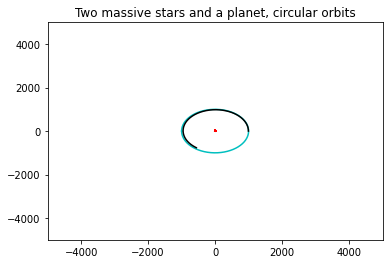

In [54]:
import matplotlib.pyplot as plt
t= np.linspace(-math.pi,math.pi,100000)
xax=-200+np.arange(0,400)
plt.ylim(-5000,5000)
plt.xlim(-5000,5000)
#plt.axis('equal')
mtot=masses[0]+masses[1]
semimajor0=rad0[0]*masses[1]/mtot
semimajor1=rad0[0]*masses[0]/mtot
#plt.title("Adaptive RK4, Rp="+str(rad0)+", m1="+str(masses[0])+", m2="+str(masses[1])+" e="+str(ecc0)+", theta="+str(round(180*theta0/math.pi)))
plt.title("Two massive stars and a planet, circular orbits")
plt.plot(ellipsefns.getxtheory(theta0[0],ecc0[0],semimajor0,t,1),ellipsefns.getytheory(theta0[0],ecc0[0],semimajor0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0[0],ecc0[0],semimajor1,t,-1),ellipsefns.getytheory(theta0[0],ecc0[0],semimajor1,t,-1),'g')
plt.plot(ellipsefns.getxtheory(theta0[1],ecc0[1],rad0[1],t,1),ellipsefns.getytheory(theta0[1],ecc0[1],rad0[1],t,1),'c')
plt.plot(npstar1x[:,0],npstar1x[:,1],'y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.plot(npstar3x[:,0],npstar3x[:,1],'k')
plt.show()

[100. 100.   1.]
200.0
[10, 1000]


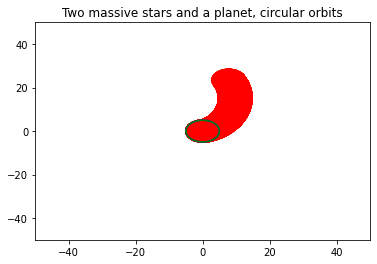

In [53]:
import matplotlib.pyplot as plt
t= np.linspace(-math.pi,math.pi,100000)
xax=-200+np.arange(0,400)
plt.ylim(-50,50)
plt.xlim(-50,50)
#plt.axis('equal')
mtot=masses[0]+masses[1]
semimajor0=rad0[0]*masses[1]/mtot
semimajor1=rad0[0]*masses[0]/mtot
print(masses)
print(mtot)
print(rad0)
#circular
#plt.title("Adaptive RK4, Rp="+str(rad0)+", m1="+str(masses[0])+", m2="+str(masses[1])+" e="+str(ecc0)+", theta="+str(round(180*theta0/math.pi)))
plt.title("Two massive stars and a planet, circular orbits")
plt.plot(ellipsefns.getxtheory(theta0[0],ecc0[0],semimajor0,t,1),ellipsefns.getytheory(theta0[0],ecc0[0],semimajor0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0[0],ecc0[0],semimajor1,t,-1),ellipsefns.getytheory(theta0[0],ecc0[0],semimajor1,t,-1),'g')
plt.plot(ellipsefns.getxtheory(theta0[1],ecc0[1],rad0[1],t,1),ellipsefns.getytheory(theta0[1],ecc0[1],rad0[1],t,1),'c')
plt.plot(npstar1x[:,0],npstar1x[:,1],'y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.plot(npstar3x[:,0],npstar3x[:,1],'k')
plt.plot(ellipsefns.getxtheory(theta0[0],ecc0[0],semimajor0,t,1),ellipsefns.getytheory(theta0[0],ecc0[0],semimajor0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0[0],ecc0[0],semimajor1,t,-1),ellipsefns.getytheory(theta0[0],ecc0[0],semimajor1,t,-1),'g')
plt.plot(ellipsefns.getxtheory(theta0[1],ecc0[1],rad0[1],t,1),ellipsefns.getytheory(theta0[1],ecc0[1],rad0[1],t,1),'c')
plt.show()

Precession of the central two stars about the three object center of mass and transfer of binding energy from the central two stars to the outer planet as the outer planet moves inward and the radii of the inner stars orbits gets larger (less bound).

Eqn 15 pg 95 of 
An Introduction to the Classical Three-Body Problem
From Periodic Solutions to Instabilities and Chaos
Govind S Krishnaswami and Himalaya Senapati


5. Restricted Three-Body Problem
The restricted three-body problem is a simplified version of the
three-body problem where one of the masses m3 is assumed much
smaller than the primaries m1 and m2. The Sun–Earth–Moon
system provides an
example of the restricted
three-body problem
where we further have
m2 = mE 
 m1 = mS.
Thus, m1 and m2 move
in Keplerian orbits which are not affected by m3. In the planar circular restricted three-body problem, the primaries move in
fixed circular orbits around their common CM with angular speed
Ω = (G(m1+m2)/d3)
1/2 given by Kepler’s third law and m3 moves
in the same plane as m1 and m2. Here, d is the separation between the primaries. This system has 2 degrees of freedom associated to the planar motion of m3, and therefore, a 4-dimensional
phase space just like the planar Kepler problem for the reduced
mass. However, unlike the latter which has three conserved quantities (energy, z-component of angular momentum and direction
of LRL vector) and is exactly solvable, the planar restricted threebody problem has only one known conserved quantity, the ‘Jacobi integral’, which is the energy of m3 in the co-rotating (noninertial) frame of the primaries: The ‘Roche’ effective
potential Veff, named
after the French
astronomer Edouard ´
Albert Roche, is a sum
of centrifugal and
gravitational energies
due to m1 and m2.
E =[1/2 m3 rdot^2  +1/2 m3 r^2 φdot^2]−1/2 m3 Ω^2 r^2 −G m3 [m1 /r1 + m2/r2]≡ T+Veff. (15)
Here, (r, φ) are the plane polar coordinates of m3 in the co-rotating
frame of the primaries with origin located at their CM while r1
and r2 are the distances of m3 from m1 and m2 (see Figure 4).

# RK4 Quality Tests

In [ ]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2
oneellipse=int(len(npdt))
plt.ylim(-200,200)
plt.xlim(-200,200)
#plt.ylim(-1,1)
#plt.xlim(74.999,75)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:oneellipse,0],npstar1x[:oneellipse,1],'y')
plt.plot(npstar2x[:oneellipse,0],npstar2x[:oneellipse,1],'r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

#plt.ylim(-200,200)
#plt.xlim(-200,200)
plt.ylim(-1,1)
plt.xlim(74.999,75)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:oneellipse,0],npstar1x[:oneellipse,1],'*y')
plt.plot(npstar2x[:oneellipse,0],npstar2x[:oneellipse,1],'*r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

#plt.ylim(-200,200)
#plt.xlim(-200,200)
plt.ylim(-10,10)
plt.xlim(-25,-20)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'*y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'*r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [ ]:
nperr

In [ ]:


plt.xlabel("timestep")
plt.ylabel("Rel err: 1/30 *|x2-x1|*(h'/h)^5")
plt.title("Relative error, RK4")
relerrplt,=plt.plot(np.arange(2,oneellipse),nperr[2:oneellipse],'b',label=" dtmin = "+ str(dtmin)+" delta = "+str(delta))
plt.legend(handles=[relerrplt])
plt.show()

This curve should be constant and about equal to delta

In [ ]:


plt.xlabel("timestep number")
plt.ylabel("timestep size")
plt.title("Evolution of timestep with step")
relerrplt,=plt.plot(np.arange(2,oneellipse),npdt[2:oneellipse],'b',label=" dtmin = "+ str(dtmin)+" delta = "+str(delta))

plt.show()

For appropriately set tolerances, adaptive timestep no longer has feedback issues. Tol=delta=0.0005 or less. The important thing is that this curve is smooth and has no constant regions where the value is pinned to either the maximum or minimum. We also seek reasonable starting values for the timestep. 

In [ ]:
plt.xlabel("x")
plt.ylabel("relative error")
plt.title("horizontal position vs relative error")
plt.plot(npstar1x[2:oneellipse,0], nperr[2:oneellipse],'b')
plt.show()

In [ ]:
plt.xlabel("y")
plt.ylabel("rel error")
plt.title("y vs rel error")
plt.plot(npstar1x[2:oneellipse,1],nperr[2:oneellipse])
plt.show()

In [ ]:
plt.xlabel("r")
plt.ylabel("rel error")
plt.title("r vs rel error")
rstar1x=np.sqrt(npstar1x[:,0]**2+npstar1x[:,1]**2)
plt.plot(rstar1x[2:oneellipse],nperr[2:oneellipse],'*b')
plt.show()

In [ ]:
plt.xlabel("t")
plt.ylabel("r")
plt.title("r vs t")
plt.plot(nptimes[2:oneellipse], rstar1x[2:oneellipse], '*b')
plt.show()

In [ ]:
thetaellipse = np.arctan2(npstar1x[2:oneellipse,1],npstar1x[2:oneellipse,0])

In [ ]:
plt.xlabel("t")
plt.ylabel("theta")
plt.title("theta vs t")
plt.plot(nptimes[2:oneellipse],thetaellipse,'b')
plt.show()

In [ ]:
plt.xlabel("theta")
plt.ylabel("rel error")
plt.title("rel error vs theta")
plt.plot(thetaellipse, nperr[2:oneellipse],'*b')
plt.show()


# Conservation of angular momentum

In [ ]:
import Lstability

In [ ]:
deltaL, Lavg=Lstability.Lstability(npstar1x,npstar2x,masses)
deltaL, Lavg

In [ ]:
deltaL*Lavg

Orbit conserves angular momentum to a tolerance of deltaL. 

# Conservation of Energy

In [ ]:
import Estability

In [ ]:
deltaE, Eavg = Estability.Estability(npstar1x, npstar2x, masses)
deltaE, Eavg

In [ ]:
deltaE*Eavg

# Conservation of Jacobi Integral for 3 body

Orbit conserves energy to a relative error of deltaE. 

In [ ]:
import numpy as np
import math
def JacobiStability2(npstar1x,npstar2x,npstar3x,masses,rad0):
    npstar1pos=npstar1x[:,0:3]
    npstar1v=npstar1x[:,3:]
    npstar2pos=npstar2x[:,0:3]
    npstar2v=npstar2x[:,3:]
    npstar3pos=npstar3x[:,0:3]
    npstar3v=npstar3x[:,3:]
    cmcoords=(masses[0]*npstar1pos+masses[1]*npstar2pos+masses[2]*npstar3pos)/(masses[0]+masses[1]+masses[2])
    
    cmprimarycoords=(masses[0]*npstar1pos+masses[1]*npstar2pos)/(masses[0]+masses[1])
    #print(cmcoords)
    cmprimaryv=(masses[0]*npstar1v+masses[1]*npstar2v)/(masses[0]+masses[1])
    r3cm=npstar3pos-cmprimarycoords
    v3cm=npstar3v-cmprimaryv
    r12=rad0[0] #np.sqrt(np.sum((npstar1pos-npstar2pos)**2,axis=1))
    r23=np.sqrt(np.sum((npstar2pos-npstar3pos)**2,axis=1))
    r31=np.sqrt(np.sum((npstar3pos-npstar1pos)**2,axis=1))
    print(r12,r23,r31)
    Omega=((masses[0]+masses[1])/r12**3)**0.5 #angular velocity of inner two stars  
    rotmat = np.array([[np.cos(Omega),np.sin(Omega)],[-np.sin(Omega),np.cos(Omega)]])
    print(rotmat)
    v3shape=v3cm.shape
    print(v3shape)
    v3cmrot=np.zeros([v3shape[0],2])
    for row in np.arange(v3shape[0]):
        for i in np.arange(0,2):
            for j in np.arange(0,2):
                v3cmrot[row,i] = rotmat[i,j]*v3cm[row,j]
    print("Omegasq=",Omega**2)
    Egrav=-masses[2]*(masses[0]/r31+masses[1]/r23)
    Ekinetic=masses[2]*0.5*np.sum(v3cmrot**2,axis=1)
    r3cmmagsq=np.sum(r3cm**2,axis=1)
    print("r3",r3cmmagsq)
    Erot=-0.5*masses[2]*Omega**2*r3cmmagsq
    Etot=Ekinetic+Egrav+Erot
    #print(Egrav,Ekinetic,Erot,Etot)
    deltaE=np.abs(np.std(Etot)/np.mean(Etot))
    return deltaE, np.mean(Etot), cmcoords, cmprimarycoords, Ekinetic, Egrav, Erot, Etot



In [ ]:
#import JacobiStability
deltaE, Javg,cm, cmprimary, Ekinetic, Egrav, Erot, Etot = JacobiStability2(npstar1x,npstar2x,npstar3x,masses,rad0)

In [ ]:
print(deltaE, Javg)

In [ ]:
masses

In [ ]:
line,=plt.plot(nptimes,Egrav,'.y',label="Egrav")
plt.plot(nptimes,Ekinetic,'c',label="Ekinetic")
#plt.plot(nptimes,Egrav+Ekinetic,'k')
plt.plot(nptimes,Erot,'.b',label="Erot")
plt.plot(nptimes,Etot,'r',label="Etot")
plt.title("Jacobi integral energy components")
plt.xlabel("time")
plt.ylabel("Energy")
plt.legend()

In [ ]:
plt.plot(cmprimary[:,0]-cm[:,0],cmprimary[:,1]-cm[:,1])
plt.title("Motion of the center of mass of the binary star system")
plt.xlabel("x")
plt.ylabel("y")

In [ ]:
plt.plot(cm[:,0], cm[:,1])
plt.title("Motion of the center of the mass of the three bodies")
plt.xlabel('X')
plt.ylabel('Y')

# Symmetry of the two stars orbits with respect to eachother 

In [ ]:
import orbitSymmetricTol

In [ ]:
allcancelsx, allcancelsa=orbitSymmetricTol.howSymmetric(npstar1x,npstar2x,npstar1a,npstar2a)

In [ ]:
allcancelsx

Orbit is symmetric with respect to x and v up to a tolerance of allcancelsx

In [ ]:
allcancelsa

In [ ]:
npstar1x

Orbit is symmetric with respect to a to up to or better than a tolerance of allcancelsa

# Testing for precision in perihelion and aphelion recovery from knowledge of the initial angle

In [ ]:
import aeTest

In [ ]:
from matplotlib import pyplot as plt
plt.plot( np.abs(npstar1x[:,1]))

In [ ]:
def findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion):
    maxindex=len(npstar1x[:,1])
    apindex=np.argmin(np.abs(npstar1x[10:int(maxindex/2),1]))+1
    print(apindex)
    delta=math.floor(.2*apindex)
    print(delta)
    perindex=np.argmin(np.abs(npstar1x[delta:apindex-delta,1]))+delta
    print(perindex)
    print(apindex/perindex)
    if np.abs(apindex/perindex-2.)>0.05: 
        perindex=np.argmin(np.abs(npstar1x[apindex+delta:2*apindex+delta,1]))+delta+apindex
        print(perindex)
        apindex,perindex=perindex,apindex
        print(apindex,perindex)
        print(apindex/perindex)
    #apindex3=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    #apindex4=np.argmin(np.abs(npstar1x[100:apindex3-100,1]))+100
    #perindex=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    if useperihelion:
        apindex,perindex=perindex,apindex
    coordap=[npstar1x[apindex,0],npstar1x[apindex,1]]
    coordper=[npstar1x[perindex,0],npstar1x[perindex,1]]
    ra=np.sqrt(np.sum(np.array(coordap)**2))
    rp=np.sqrt(np.sum(np.array(coordper)**2))
    e=(ra-rp)/(ra+rp)
    a=1./2.*(ra+rp)
    deltae=np.abs(e-ecc0)/ecc0
    deltaa=np.abs(a-rad0)/rad0
    return apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

In [ ]:
if theta0==0:
    apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa=findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion)

In [ ]:
if theta0!=0:
    perindex,apindex,coordper,coordap,rp,ra,e,a,deltae,deltaa=aeTest.findPerApHelion(npstar1x,theta0,ecc0,rad0)

Recovered perihelion radius given by r_per, recovered aphelion radius given by r_ap, a is semimajor axis computed from the orbit, e is eccentricty computed from the orbit, delta a is relative error on the semimajor axis, and delta e is eccenticity relative error. 

In [ ]:
apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

In [ ]:
plt.plot(nptimes[:perindex],npstar1x[:perindex,1])

# Fit t as a function of the eccentric anomoly (angle from the center of the elipse)

In [ ]:
def findEccentricAnomoly(coordap, coordper):
    Ecenter=np.array(coordap)+np.array(coordper)
    Ecenter/=2.
    return Ecenter


In [ ]:
ellipsecenter=findEccentricAnomoly(coordap,coordper)

In [ ]:
ellipsecenter

In [ ]:
def getEllipsecenter(ecc,rad,theta, useperihelion):
    #ind of use perihelion
    rp=rad*(1-ecc)
    ra=-rad*(1+ecc)
    rcent=(rp+ra)/2
    #print(rp,ra,rcent)
    rcentx=rcent*np.cos(theta)
    rcenty=rcent* np.sin(theta)
    return [rcentx,rcenty]

In [ ]:
(np.array(coordap)+np.array(coordper))/2

In [ ]:
getEllipsecenter(ecc0,rad0,theta0, True)

In [ ]:
np.arctan2(-1.,0)/math.pi*180

In [ ]:
def getEang(npstar2x,ecc,rad,theta, useperihelion):
    ellipsecenter=getEllipsecenter(ecc,rad,theta, useperihelion)
    #print(ellipsecenter)
    #print(npstar1x)
    #print(npstar1x[:,0])
    xfortan=npstar2x[:,0]-ellipsecenter[0]
    yfortan=npstar2x[:,1]-ellipsecenter[1]
    #print("xy",xfortan,yfortan)
    Eang=np.arctan2(yfortan,xfortan)
    Eangtheta=2*np.arctan2(np.sqrt(1-ecc)*np.sin(theta/2.),np.sqrt(1+ecc)*np.cos(theta/2.))
    Eang-=Eangtheta
    #if useperihelion:
    #    Eang-=math.pi
    print(len(Eang))
    for i in np.arange(len(Eang)):
        #if xfortan[i]<0:
        #    Eang[i]+=math.pi
        if Eang[i]<0:
            Eang[i]+=2*math.pi
    print(xfortan,yfortan,Eang/math.pi*180)
    print("Eang",Eang)
    return xfortan, yfortan,Eang

In [ ]:
np.arctan2(-6.69327422*10**-6, -0.02240526)

In [ ]:
def xofeccanom(rad,Eang,ecc):
    return rad*(np.cos(Eang)+ecc)

In [ ]:
def yofeccanom(rad, Eang, ecc):
    b=getsemiminor(rad,ecc)
    return b*np.sin(Eang) 

In [ ]:
def tofEccAnom(npstar2x, rad,ecc,theta,mass, useperihelion):
    xE0,yE0,Eang=getEang(npstar2x,ecc,rad,theta, useperihelion)
    b=getsemiminor(rad,ecc)
    #fitval=rad*b*(Eang-ecc*np.sin(Eang))
    sgn=-1
    if useperihelion:
        sgn*=-1
    # added a factor of 2 in front of fitval
    fitval=rad**(1.5)*mass**(-.5)*(Eang-sgn*ecc*np.sin(Eang))
    fitval*=2
    print(Eang, ecc,rad,mass,fitval)
    return fitval

In [ ]:
def residualtEang(pars,nptimes,npstar2x):
    residual=np.abs(nptimes-tofEccAnom(npstar2x,pars['rad'],pars['ecc'],pars['theta'],pars['mass'],pars['useperihelion']))
    #print(nptimes, residual)
    return residual

In [ ]:
endindex=apindex
if useperihelion:
    endindex=perindex

In [ ]:
endindex

In [ ]:
xE0,yE0,Eang0=getEang(npstar2x[0:endindex-1,:],ecc0,rad0,theta0, useperihelion)

In [ ]:
nptimesoneorbit=nptimes[0:endindex-1]

In [ ]:
plt.plot(Eang0, xE0)

In [ ]:
plt.plot(Eang0, yE0)

In [ ]:
plt.plot(xE0,yE0)

In [ ]:
plt.plot(nptimesoneorbit,xE0)

In [ ]:
plt.plot(nptimesoneorbit,yE0)

In [ ]:
plt.plot(nptimesoneorbit,yE0/xE0)

In [ ]:
np.arctan(0./1.)

In [ ]:
yE0[0]

In [ ]:
xE0[0]

In [ ]:
plt.plot(nptimesoneorbit,np.arctan2(yE0,xE0)*180/math.pi)

In [ ]:
Eangtest=tofEccAnom(npstar2x[0:endindex-1,:],rad0,ecc0,theta0,masses[0], useperihelion)

In [ ]:
np.max(Eangtest)

In [ ]:
nptimes[0]

In [ ]:
nptimesoneorbit=nptimes[0:endindex-1]

In [ ]:
tpredoneorbit=Eangtest[0:endindex-1]

In [ ]:
Eangoneorbit=Eang0[0:endindex-1]

In [ ]:
plt.plot(nptimesoneorbit,npstar2x[0:endindex-1,1])

In [ ]:
plt.plot(nptimesoneorbit,Eangoneorbit/math.pi*180)

In [ ]:
plt.plot(nptimesoneorbit,tpredoneorbit)

In [ ]:
plt.plot(nptimesoneorbit,tpredoneorbit, label='times')
plt.xlabel("T timesteps")
plt.ylabel("T computed from angle")
plt.title("Times using start parameters")
plt.show()
plt.plot(nptimesoneorbit,tpredoneorbit-nptimesoneorbit, label='residual')
plt.legend()
plt.show()


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
plt.scatter(nptimesoneorbit,tpredoneorbit)

In [ ]:
from lmfit import Minimizer,Parameters
pfittEang = Parameters()
pfittEang.add(name='theta', value=theta0, min=theta0-math.pi, max=theta0+math.pi, vary=True)
pfittEang.add(name='rad', value=rad0, min=0, vary=True)
pfittEang.add(name='ecc', value=ecc0, min=0, max=1.0, vary=True)
pfittEang.add(name='mass', value=masses[0], vary=False)
pfittEang.add(name='useperihelion', value=True, vary=False)

minit = Minimizer(residualtEang, pfittEang, fcn_args=(nptimesoneorbit,npstar2x[:endindex-1,:]))

outt = minit.leastsq()

In [ ]:
outt

Semimajor axis fit is good to about .1 percent at an eccentricity of 0.5. rad=49.886512 for delta=0.0001. rad=49.8863857 for delta = 0.0005. ecc = 0.51764747 for delta = 0.0001. ecc = 0.51765166 for delta = 0.0005. so both ecc and rad improve with a smaller delta, but not quickly. The program runs very slowly for large delta and requires 500000 timesteps for delta=0.0001. 

In [ ]:
tfinal=nptimesoneorbit[endindex-2]
tfinal

In [ ]:
from scipy.fft import fft

In [ ]:
from scipy.signal import blackman
wndow=blackman(len(nptimesoneorbit))

In [ ]:
ftresiduals=fft(nptimesoneorbit-tpredoneorbit)

In [ ]:
xf = np.linspace(0.0, 1.0/(2.0*dt), len(nptimesoneorbit)//2)

In [ ]:
plt.semilogy(xf[1:len(nptimesoneorbit)//2], 2.0/len(nptimesoneorbit) * np.abs(ftresiduals[1:len(nptimesoneorbit)//2]), '-b')

In [ ]:
ftr=fft(np.sqrt(npstar1x[:endindex-1,0]**2+npstar1x[:endindex-1,1]**2))

In [ ]:
plt.xlabel("frequency")
plt.ylabel("Fourier transform of t(E)")
plt.title("Fourier transform of time computed from eccentric anomaly")
plt.semilogy(xf[1:len(nptimesoneorbit)//2], 2.0/len(nptimesoneorbit) * np.abs(ftr[1:len(nptimesoneorbit)//2]), '-b')

This is the fourier transform of the triangle wave.

In [ ]:
plt.title("Fourier transform of residuals of times")
plt.xlabel("frequency")
plt.ylabel("FT(t(E))")
plt.semilogy(xf[1:50], 2.0/len(nptimesoneorbit) * np.abs(ftresiduals[1:50]), '-b')

In [ ]:
plt.xlabel("bin number")
plt.ylabel("FT(t(E))")
plt.title("Fourier transform of residuals of times")
plt.semilogy(np.arange(1,30), 2.0/len(nptimesoneorbit[:29]) * np.abs(ftresiduals[1:30]), '*b')

Peak at the second harmonic and the sixth harmonic. The second harmonic seems natural due to the symmetry of the orbit but the sixth harmonic is harder to explain. 

Implementing the Adaptive RK4 hasn't changed the fit, residuals, or harmonics, sadly. There is still a 2% error in the fit for an eccentricity of 0.5